In [12]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
train_dir = "archive/train"
test_dir = "archive/test"
training_csv = "archive/Training_set.csv"
testing_csv = "archive/Testing_set.csv"

train_df = pd.read_csv(training_csv)
test_df = pd.read_csv(testing_csv)



label_encoder = LabelEncoder()
train_df['encoded_label'] = label_encoder.fit_transform(train_df['label'])


selected_classes = label_encoder.transform(label_encoder.classes_[:5])
train_df = train_df[train_df['encoded_label'].isin(selected_classes)]

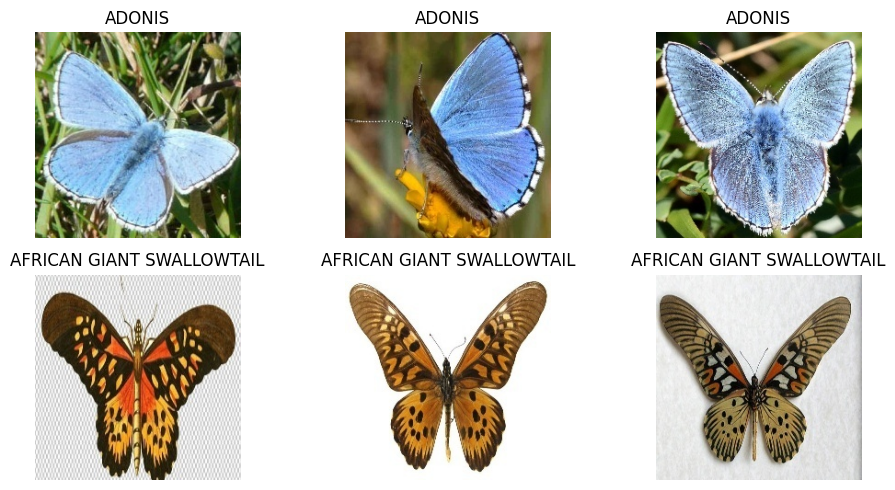

In [14]:
sample_classes = selected_classes[:2]
plt.figure(figsize=(10, 5))
for i, cls in enumerate(sample_classes):
    sample_images = train_df[train_df['encoded_label'] == cls].sample(3)
    for j, (_, row) in enumerate(sample_images.iterrows()):
        img_path = os.path.join(train_dir, row['filename'])
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        plt.subplot(2, 3, i * 3 + j + 1)
        plt.imshow(img)
        plt.title(label_encoder.inverse_transform([cls])[0])
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
train_data, val_data = train_test_split(train_df, test_size=0.2, stratify=train_df['encoded_label'], random_state=42)

train_images = []
train_labels = []
val_images = []
val_labels = []


for _, row in train_data.iterrows():
    img_path = os.path.join(train_dir, row['filename'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    train_images.append(img_array)
    train_labels.append(row['encoded_label'])

for _, row in val_data.iterrows():
    img_path = os.path.join(train_dir, row['filename'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    val_images.append(img_array)
    val_labels.append(row['encoded_label'])

train_images = np.array(train_images)
train_labels = to_categorical(train_labels, num_classes=len(selected_classes))
val_images = np.array(val_images)
val_labels = to_categorical(val_labels, num_classes=len(selected_classes))


test_images = []

if 'filename' not in test_df.columns:
    raise ValueError("Testing_set.csv must contain 'filename' column.")

for _, row in test_df.iterrows():
    img_path = os.path.join(test_dir, row['filename'])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    test_images.append(img_array)

test_images = np.array(test_images)

In [ ]:
test_images = np.array(test_images)

model_scratch = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(selected_classes), activation='softmax')
])


/home/perry/kpi1m/data_analysis/p310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1735337991.240616   65410 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
model_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_scratch = model_scratch.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=10,
    batch_size=32
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.1948 - loss: 5.6896 - val_accuracy: 0.6386 - val_loss: 1.1636
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6489 - loss: 0.9800 - val_accuracy: 0.8554 - val_loss: 0.5360
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8664 - loss: 0.4628 - val_accuracy: 0.8675 - val_loss: 0.4821
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9524 - loss: 0.2550 - val_accuracy: 0.8072 - val_loss: 0.6709
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9367 - loss: 0.2556 - val_accuracy: 0.8193 - val_loss: 0.6672
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9554 - loss: 0.1459 - val_accuracy: 0.8916 - val_loss: 0.5812
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9853 - loss: 0.0769 - val_accuracy: 0.8795 - val_loss: 0.5622
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9902 - loss: 0.0643 - val_accuracy: 0.8675 - val_loss:

In [6]:
scratch_acc = max(history_scratch.history['val_accuracy'])
print(f"Accuracy from scratch: {scratch_acc:.2f}")

Accuracy from scratch: 0.89


In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model_transfer = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(selected_classes), activation='softmax')
])

model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_transfer = model_transfer.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=10,
    batch_size=32
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.1921 - loss: 12.7528 - val_accuracy: 0.4096 - val_loss: 1.4006
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.2951 - loss: 1.5159 - val_accuracy: 0.2410 - val_loss: 1.4721
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.2165 - loss: 1.5003 - val_accuracy: 0.1687 - val_loss: 1.4624
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.2177 - loss: 1.5374 - val_accuracy: 0.2410 - val_loss: 1.4770
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.2138 - loss: 1.5336 - val_accuracy: 0.3133 - val_loss: 1.4328
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.3262 - loss: 1.5019 - val_accuracy: 0.3133 - val_loss: 1.4377
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.3240 - loss: 1.4803 - val_accuracy: 0.2771 - val_loss: 1.4020
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.3

In [8]:
transfer_acc = max(history_transfer.history['val_accuracy'])
print(f"Accuracy with transfer learning: {transfer_acc:.2f}")

Accuracy with transfer learning: 0.41


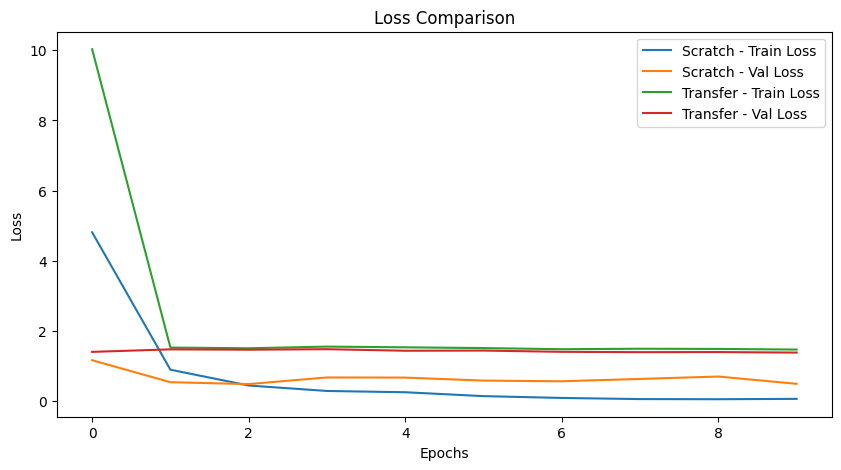

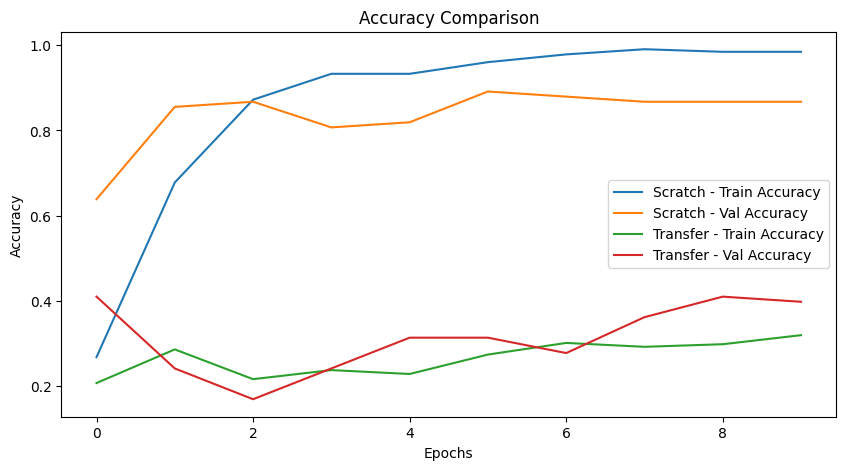

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_scratch.history['loss'], label='Scratch - Train Loss')
plt.plot(history_scratch.history['val_loss'], label='Scratch - Val Loss')
plt.plot(history_transfer.history['loss'], label='Transfer - Train Loss')
plt.plot(history_transfer.history['val_loss'], label='Transfer - Val Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history_scratch.history['accuracy'], label='Scratch - Train Accuracy')
plt.plot(history_scratch.history['val_accuracy'], label='Scratch - Val Accuracy')
plt.plot(history_transfer.history['accuracy'], label='Transfer - Train Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer - Val Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
